# SAP Challenge Notebook


## Imports

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

ModuleNotFoundError: No module named 'kats'

## Load Data Set

,product_id,store_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,...,city_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,...,C007,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25,PR14,NaN,PR03,...,C005,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25,PR14,NaN,PR03,...,C026,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25,PR14,NaN,PR03,...,C008,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25,PR14,NaN,PR03,...,C024,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006


<AxesSubplot:xlabel='date'>

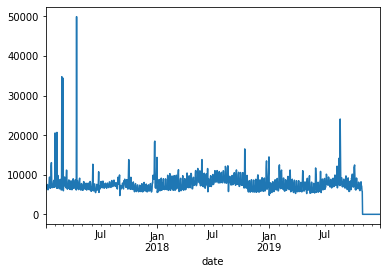

In [11]:
df_stores = pd.read_csv('../dataset/turkish_retail_data/store_cities.csv',
                        delimiter=',',
                        dtype={'store_id':'category',
                               'storetype_id':'category',
                               'city_id':'category'})
df_sales = pd.read_csv('../dataset/turkish_retail_data/sales.csv',
                       delimiter=',',
                       dtype={"product_id":"category",
                              "store_id":"category",
                              "promo_type_1":"category",
                              "promo_bin_1":"category",
                              "promo_type_2":"category",
                              "promo_bin_2":"category",
                              "promo_discount_2":"category",
                              "promo_discount_type_2":"category"},
                       parse_dates=["date"])
df_product_hierachy = pd.read_csv('../dataset/turkish_retail_data/product_hierarchy.csv',
                                 delimiter= ',',
                                 dtype={'product_id':'category',
                                        'cluster_id':'category',
                                        'hierarchy1_id':'category',
                                        'hierarchy2_id':'category',
                                        'hierarchy3_id':'category',
                                        'hierarchy4_id':'category',
                                        'hierarchy5_id':'category'})

df_sales = df_sales.join(df_stores.set_index('store_id'), on = 'store_id')
df_sales = df_sales.join(df_product_hierachy.set_index('product_id'), on='product_id')
display(df_sales.head())

ts_global_sales = df_sales.groupby(by=['date'])['sales'].sum()

ts_global_sales.plot()
plt.show()

## Transform into time series

In [ ]:
ts_global_sales = TimeS